In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [45]:
mrt_df = pd.read_csv('Data\LTA API\PassengerVolumeByTrainStations\\transport_node_train_202408.csv')

In [46]:
mrt_df.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2024-08,WEEKENDS/HOLIDAY,22,TRAIN,NS28,399,202
1,2024-08,WEEKDAY,22,TRAIN,NS28,405,271
2,2024-08,WEEKENDS/HOLIDAY,0,TRAIN,DT10/TE11,50,271
3,2024-08,WEEKDAY,0,TRAIN,DT10/TE11,130,480
4,2024-08,WEEKENDS/HOLIDAY,10,TRAIN,EW16/NE3/TE17,9505,10674


In [47]:
mrt_df.describe()

,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
count,6820.000000,6820.000000,6820.000000
mean,13.339003,12432.206012,12433.322581
std,6.116053,20261.031448,20265.863977
min,0.000000,0.000000,0.000000
25%,9.000000,1710.750000,1822.500000
50%,14.000000,5019.000000,5099.000000
75%,19.000000,14592.750000,14250.000000
max,23.000000,362736.000000,343937.000000


In [48]:
mrt_thomson_ec_df = mrt_df[mrt_df['PT_CODE'].str.contains('TE')].copy()
mrt_thomson_ec_df

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
2,2024-08,WEEKENDS/HOLIDAY,0,TRAIN,DT10/TE11,50,271
3,2024-08,WEEKDAY,0,TRAIN,DT10/TE11,130,480
4,2024-08,WEEKENDS/HOLIDAY,10,TRAIN,EW16/NE3/TE17,9505,10674
5,2024-08,WEEKDAY,10,TRAIN,EW16/NE3/TE17,28049,38756
10,2024-08,WEEKDAY,0,TRAIN,NS27/CE2/TE20,64,255
...,...,...,...,...,...,...,...
6754,2024-08,WEEKDAY,23,TRAIN,TE4,2731,1690
6805,2024-08,WEEKENDS/HOLIDAY,23,TRAIN,TE5,261,1504
6806,2024-08,WEEKDAY,23,TRAIN,TE5,459,3179
6816,2024-08,WEEKENDS/HOLIDAY,7,TRAIN,NS27/CE2/TE20,471,776


In [49]:
mrt_thomson_ec_df.describe()

,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
count,800.00000,800.000000,800.000000
mean,13.30000,10238.552500,10589.383750
std,6.15283,18548.145377,19892.978427
min,0.00000,0.000000,0.000000
25%,8.75000,1873.250000,2105.250000
50%,13.50000,4389.500000,4410.000000
75%,18.25000,10245.250000,9253.000000
max,23.00000,162772.000000,207640.000000


In [54]:
mrt_thomson_ec_df['PT_CODE'].unique()

array(['DT10/TE11', 'EW16/NE3/TE17', 'NS27/CE2/TE20', 'TE16', 'TE15',
       'TE22', 'NS9/TE2', 'TE6', 'TE5', 'TE3', 'TE4', 'TE12', 'TE13',
       'TE8', 'CC17/TE9', 'TE19', 'TE18', 'TE1', 'TE14/NS22', 'TE7'],
      dtype=object)

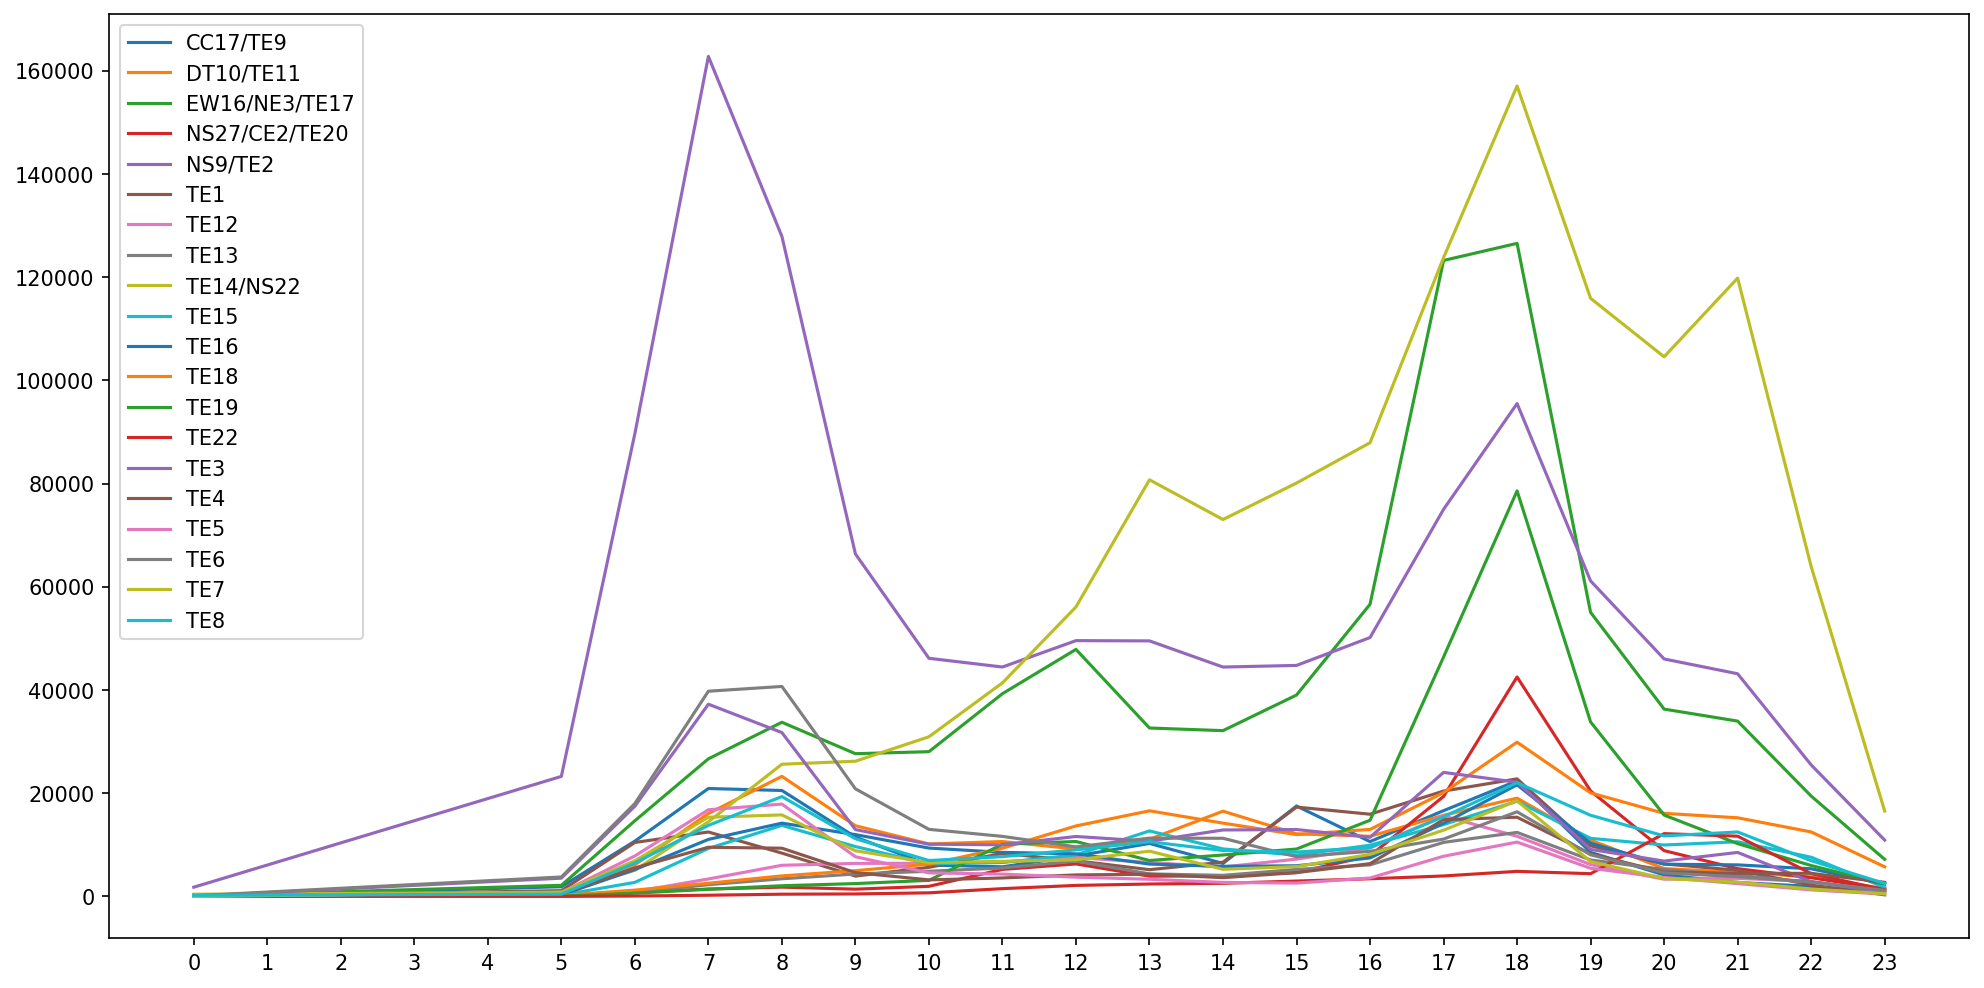

In [50]:
plt.figure(figsize=(16, 8), dpi=150) 

stations = mrt_thomson_ec_df['PT_CODE'].unique()
stations.sort()

for pt in stations:
    temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKDAY'].copy()
    temp_df = temp_df[temp_df['PT_CODE'] == pt].copy().sort_values(by='TIME_PER_HOUR')
    plt.plot(temp_df['TIME_PER_HOUR'], temp_df['TOTAL_TAP_IN_VOLUME'], label = pt)

plt.legend()
plt.xticks(np.arange(0, 24, 1.0))
plt.show()

# Peak periods at 7.30am and 6pm (going in and back from work) for weekdays

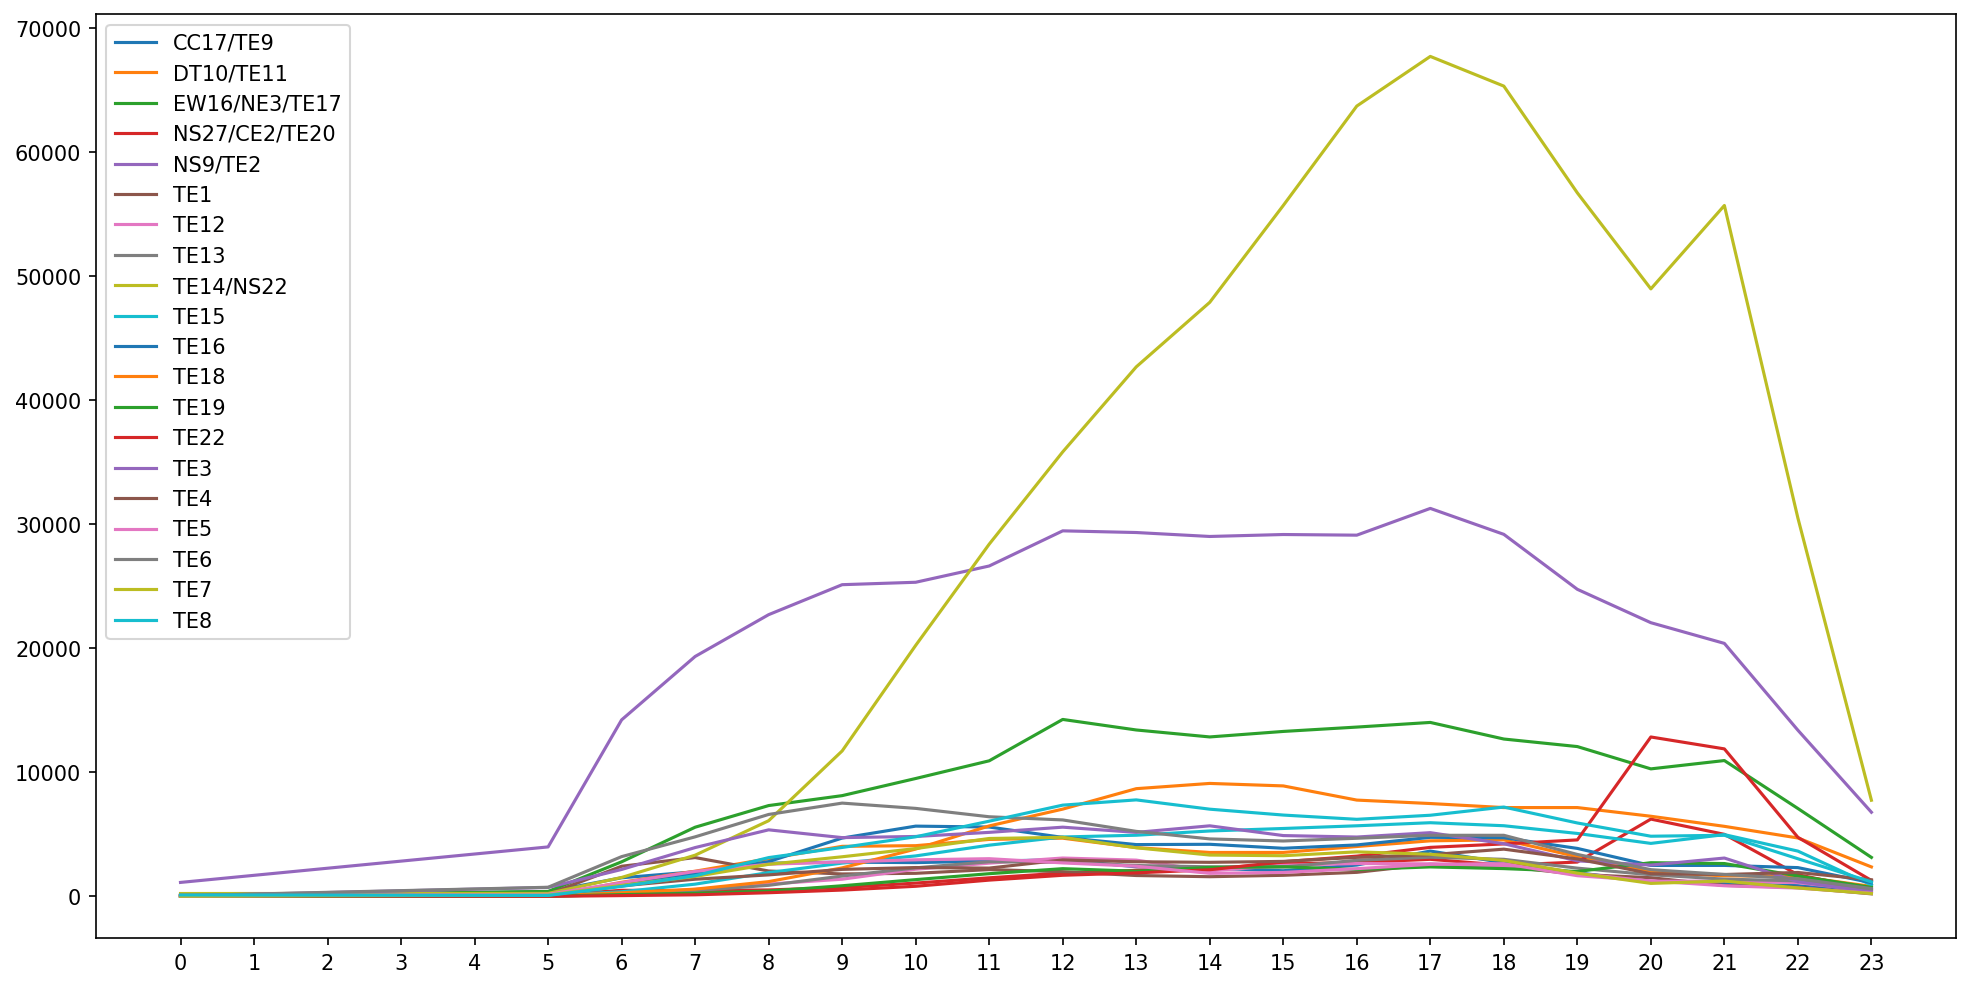

In [51]:
plt.figure(figsize=(16, 8), dpi=150) 

stations = mrt_thomson_ec_df['PT_CODE'].unique()
stations.sort()

for pt in stations:
    temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'].copy()
    temp_df = temp_df[temp_df['PT_CODE'] == pt].copy().sort_values(by='TIME_PER_HOUR')
    plt.plot(temp_df['TIME_PER_HOUR'], temp_df['TOTAL_TAP_IN_VOLUME'], label = pt)

plt.legend()
plt.xticks(np.arange(0, 24, 1.0))
plt.show()

# Much less volume overall
# Ramps up in the morning and stays for most of the day
# Peaks around 5pm

In [52]:
mrt_thomson_ec_df_numeric = mrt_thomson_ec_df[['TIME_PER_HOUR', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME']]

In [53]:
mrt_thomson_ec_df_numeric.corr()

,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
TIME_PER_HOUR,1.000000,0.119114,0.047425
TOTAL_TAP_IN_VOLUME,0.119114,1.000000,0.697791
TOTAL_TAP_OUT_VOLUME,0.047425,0.697791,1.000000
